<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [59]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

data = pd.read_csv('./T1_data/2022-task1_data.csv')
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

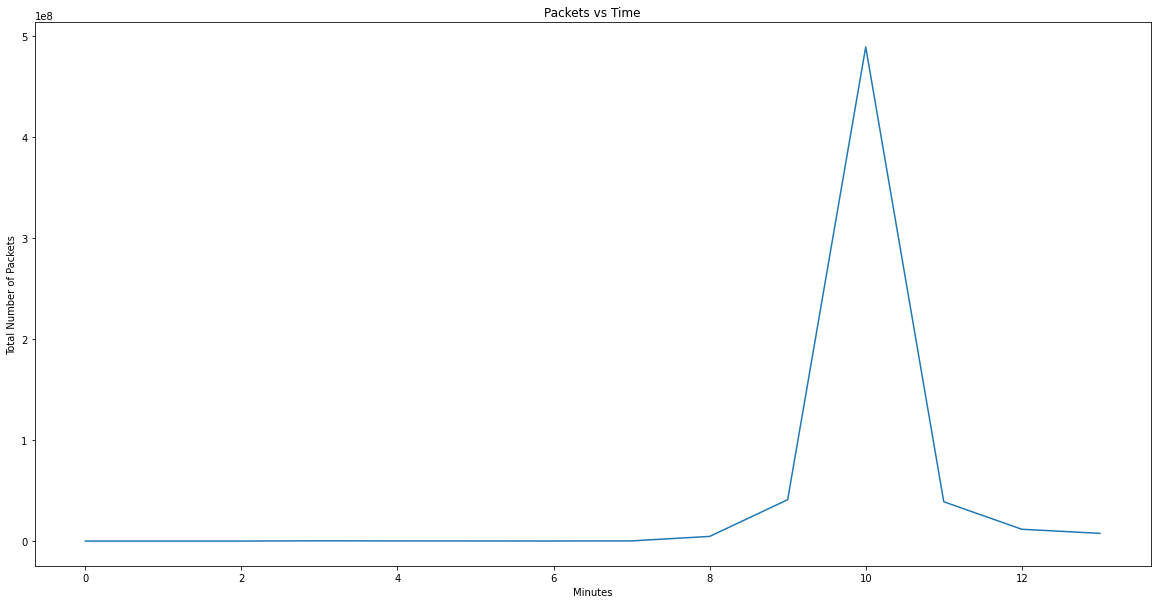

In [60]:
data.Time = data.Time//60
number_packets = data.groupby(['Time'])['No.'].sum()


plt.figure(figsize=(20,10))
plt.plot(number_packets)
plt.title('Packets vs Time')
plt.xlabel('Minutes')
plt.ylabel('Total Number of Packets')
plt.show()

### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

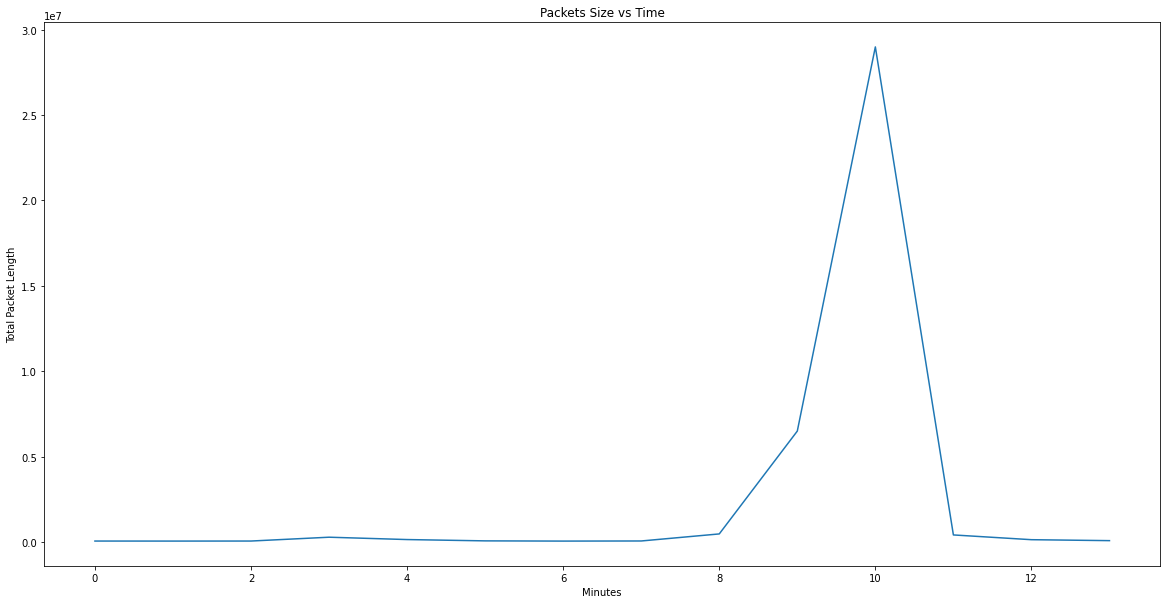

In [61]:
# ANSWER
length_packets = data.groupby(['Time'])['Length'].sum()
plt.figure(figsize=(20,10))
plt.plot(length_packets)
plt.title('Packets Size vs Time')
plt.xlabel('Minutes')
plt.ylabel('Total Packet Length')
plt.show()

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

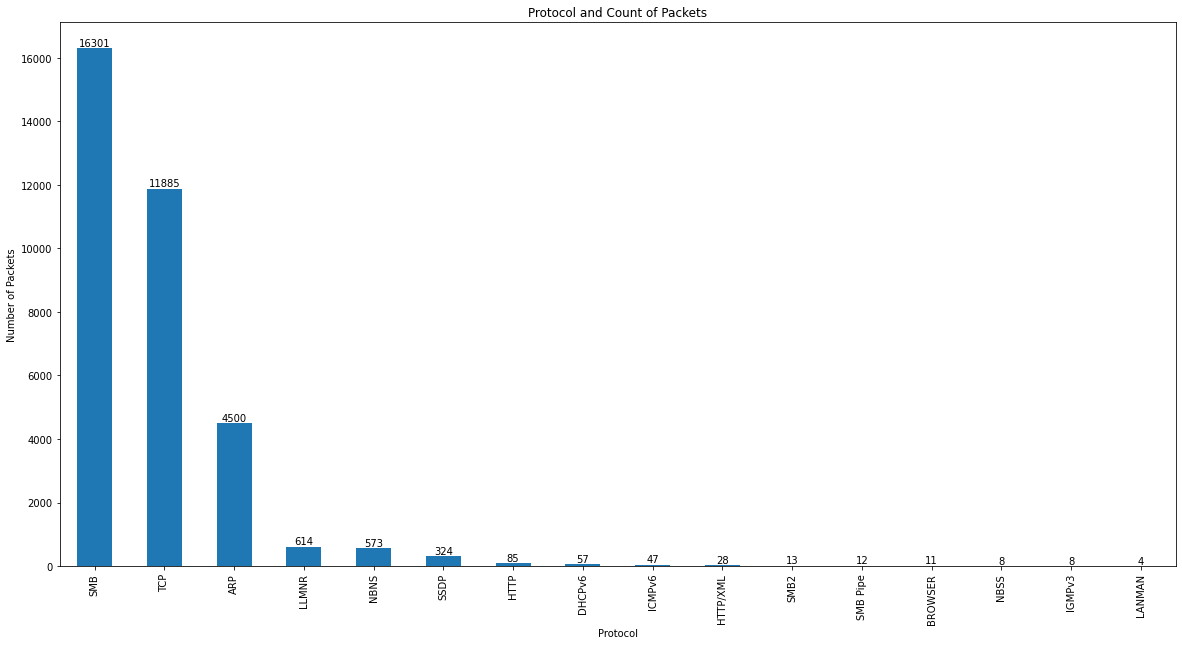

In [62]:
# ANSWER
ax = data['Protocol'].value_counts().plot(kind='bar',figsize=(20,10),title='Protocol and Count of Packets', ylabel='Number of Packets', xlabel='Protocol',)
for container in ax.containers:
    ax.bar_label(container)


In [63]:
data.head()


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.0,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.0,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.0,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.0,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,0.0,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."


### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

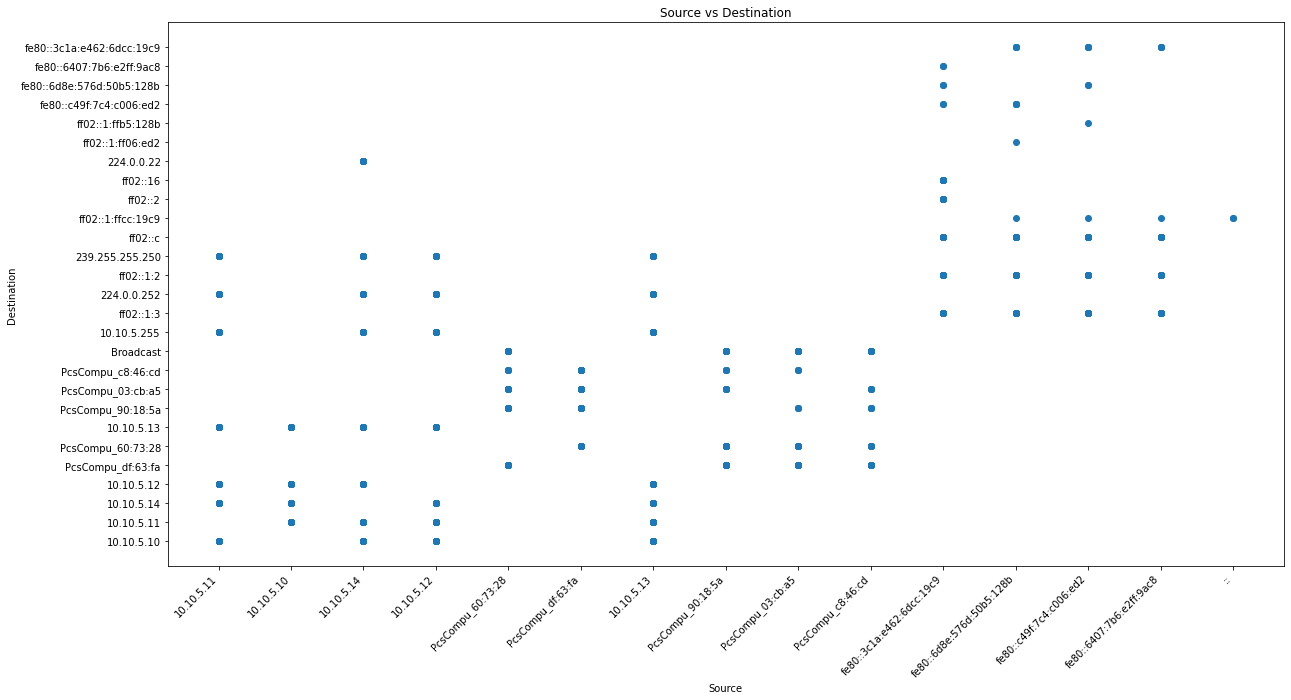

In [64]:
### ANSWER


plt.figure(figsize=(20,10))
plt.scatter(data.Source, data.Destination)
plt.title('Source vs Destination')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.show()

### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

In [65]:
# ANSWER
data = data[data['Source'].str.contains("10.")]
data.Source.value_counts()

10.10.5.14    9303
10.10.5.12    9071
10.10.5.13    6117
10.10.5.11    4455
10.10.5.10     451
Name: Source, dtype: int64

### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

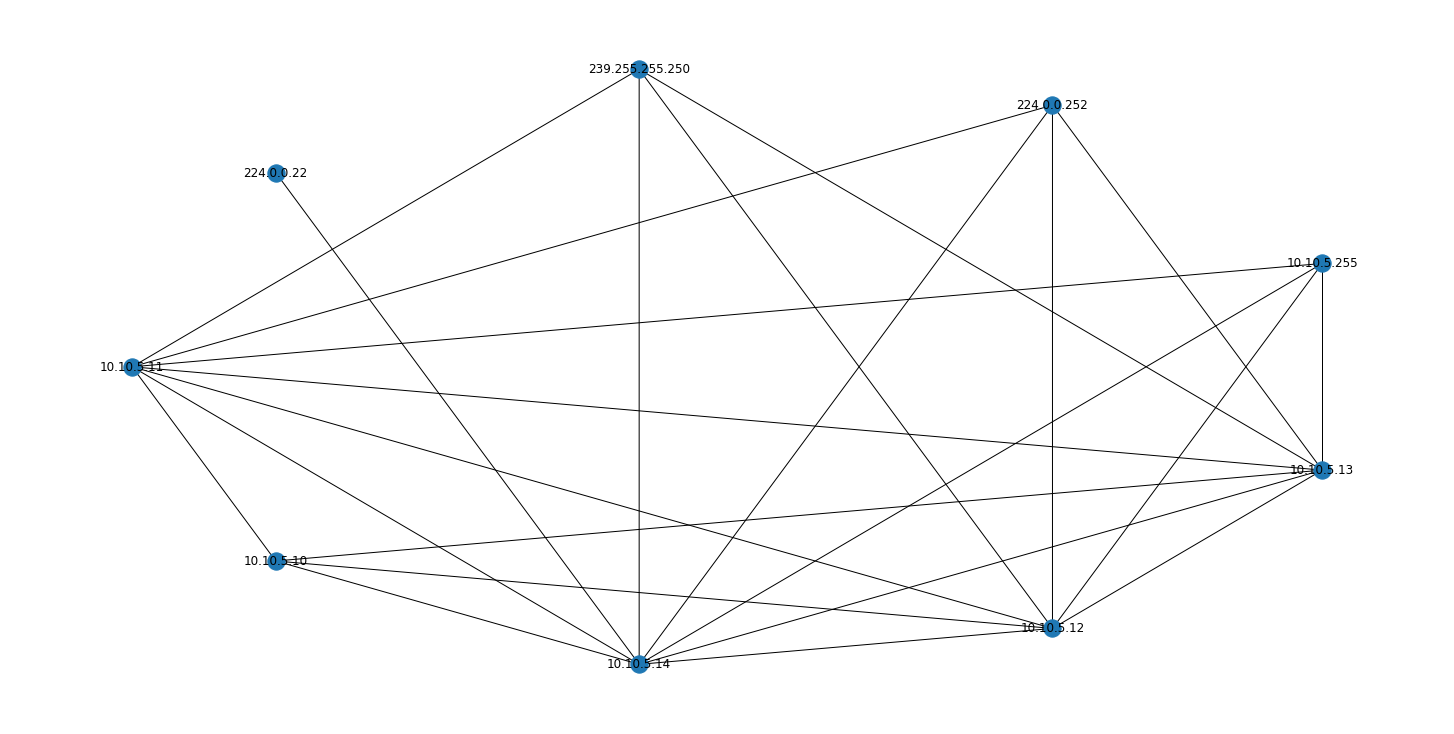

In [66]:
# ANSWER
import networkx as nx
from matplotlib.pyplot import figure
G = nx.Graph()

G = nx.from_pandas_edgelist(data, 'Source', 'Destination')
figure(figsize=(20, 10))
nx.draw_shell(G, with_labels=True)

### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [67]:
# ANSWER
x= data.Protocol.unique()
for i in range(len(x)):
    data[x[i]] = x[i]

for col in data.columns[7:20]:
    data[col].values[:] = 'False'

df = data

df.loc[df["Protocol"] == "TCP", "TCP"] = True
df.loc[df["Protocol"] == "NBNS", "NBNS"] = True
df.loc[df["Protocol"] == "LLMNR", "LLMNR"] = True
df.loc[df["Protocol"] == "SSDP", "SSDP"] = True
df.loc[df["Protocol"] == "HTTP", "HTTP"] = True
df.loc[df["Protocol"] == "HTTP/XML", "HTTP/XML"] = True
df.loc[df["Protocol"] == "BROWSER", "BROWSER"] = True
df.loc[df["Protocol"] == "SMB", "SMB"] = True
df.loc[df["Protocol"] == "SMB Pipe", "SMB Pipe"] = True
df.loc[df["Protocol"] == "NBSS", "NBSS"] = True
df.loc[df["Protocol"] == "IGMPv3", "IGMPv3"] = True
df.loc[df["Protocol"] == "SMB2", "SMB2"] = True
df.loc[df["Protocol"] == "LANMAN", "LANMAN"] = True
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,TCP,NBNS,LLMNR,SSDP,HTTP,HTTP/XML,BROWSER,SMB,SMB Pipe,NBSS,IGMPv3,SMB2,LANMAN
0,1,0.0,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",True,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0.0,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3,0.0,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",True,False,False,False,False,False,False,False,False,False,False,False,False
3,4,0.0,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,True,False,False,False,False,False,False,False,False,False,False,False,False
4,5,0.0,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",True,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.Protocol.unique()

array(['TCP', 'NBNS', 'LLMNR', 'SSDP', 'HTTP', 'HTTP/XML', 'BROWSER',
       'SMB', 'SMB Pipe', 'NBSS', 'IGMPv3', 'SMB2', 'LANMAN'],
      dtype=object)

### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

In [69]:
TCP  = data.loc[(data['Protocol'] == 'TCP')]
NBNS  = data.loc[(data['Protocol'] == 'NBNS')]
LLMNR  = data.loc[(data['Protocol'] == 'LLMNR')]
SSDP  = data.loc[(data['Protocol'] == 'SSDP')]
HTTP  = data.loc[(data['Protocol'] == 'HTTP')]
HTTP_XML  = data.loc[(data['Protocol'] == 'HTTP/XML')]
BROWSER  = data.loc[(data['Protocol'] == 'BROWSER')]
SMB  = data.loc[(data['Protocol'] == 'SMB')]
SMB_pipe  = data.loc[(data['Protocol'] == 'MB Pipe')]
NBSS  = data.loc[(data['Protocol'] == 'NBSS')]
IGMPv3  = data.loc[(data['Protocol'] == 'IGMPv3')]
SMB2  = data.loc[(data['Protocol'] == 'SMB2')]
LANMAN  = data.loc[(data['Protocol'] == 'LANMAN')]


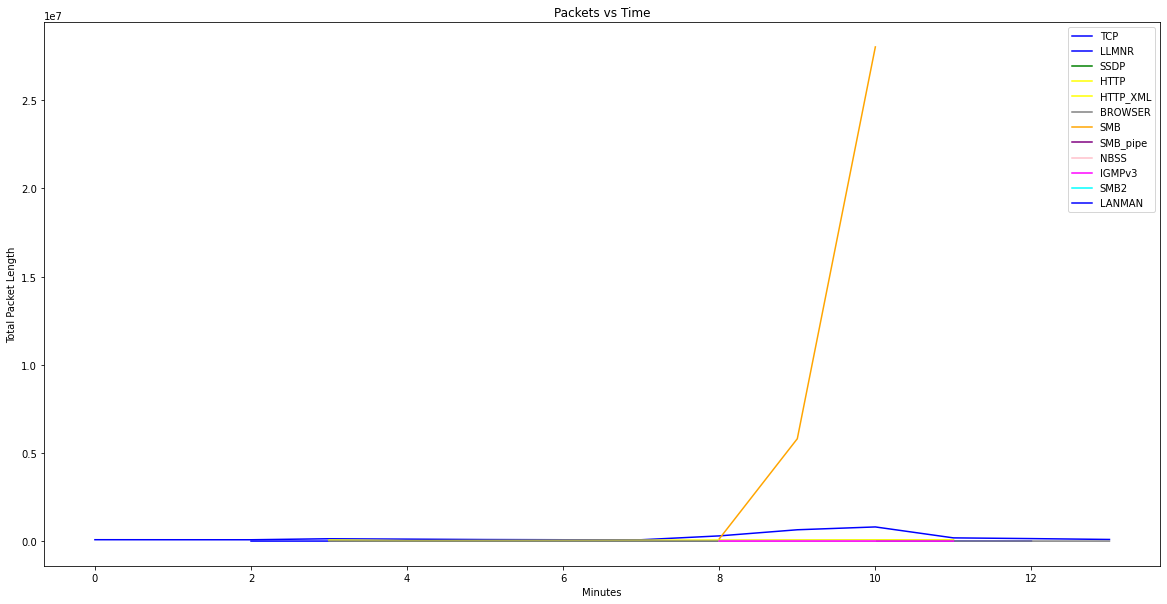

In [80]:
length_packets_TCP = TCP.groupby(['Time'])['Length'].sum()

length_packets_NBNS = NBNS.groupby(['Time'])['Length'].sum()

length_packets_LLMNR = LLMNR.groupby(['Time'])['Length'].sum()

length_packets_SSDP = SSDP.groupby(['Time'])['Length'].sum()

length_packets_HTTP = HTTP.groupby(['Time'])['Length'].sum()

length_packets_HTTP_XML = HTTP_XML.groupby(['Time'])['Length'].sum()

length_packets_BROWSER = BROWSER.groupby(['Time'])['Length'].sum()

length_packets_SMB = SMB.groupby(['Time'])['Length'].sum()

length_packets_SMB_pipe = SMB_pipe.groupby(['Time'])['Length'].sum()

length_packets_NBSS = NBSS.groupby(['Time'])['Length'].sum()

length_packets_IGMPv3 = IGMPv3.groupby(['Time'])['Length'].sum()

length_packets_SMB2 = SMB2.groupby(['Time'])['Length'].sum()

length_packets_LANMAN = LANMAN.groupby(['Time'])['Length'].sum()

plt.figure(figsize=(20,10))
plt.plot(length_packets_TCP, color='blue', label='TCP')
plt.plot(length_packets_NBNScolor='red', label='NBNS')
plt.plot(length_packets_LLMNR, color='blue', label='LLMNR')
plt.plot(length_packets_SSDP, color='green', label='SSDP')
plt.plot(length_packets_HTTP, color='yellow', label='HTTP')
plt.plot(length_packets_HTTP_XML, color='yellow', label='HTTP_XML')
plt.plot(length_packets_BROWSER, color='grey', label='BROWSER')
plt.plot(length_packets_SMB, color='orange', label='SMB')
plt.plot(length_packets_SMB_pipe, color='purple', label='SMB_pipe')
plt.plot(length_packets_NBSS, color='pink', label='NBSS')
plt.plot(length_packets_IGMPv3, color='magenta', label='IGMPv3')
plt.plot(length_packets_SMB2, color='cyan', label='SMB2')
plt.plot(length_packets_LANMAN, color='blue', label='LANMAN')

plt.title('Packets vs Time')
plt.xlabel('Minutes')
plt.legend()
plt.ylabel('Total Packet Length')
plt.show()


In [42]:
import pandas as pd
sales = pd.read_csv('Sales_Data.csv')
sales.head()

,OrderDate,ShippingDate,ProductID,Zip,Units,Revenue,Currency
0,2010-01-15 00:00:00,2010-01-17 00:00:00,25,7825,1,792.750,USD
1,2010-01-15 00:00:00,2010-01-17 00:00:00,33,97231,1,734.475,USD
2,2010-01-15 00:00:00,2010-01-17 00:00:00,36,40108,1,414.750,GBP
3,2010-01-15 00:00:00,2010-01-17 00:00:00,36,92122,1,414.750,USD
4,2010-01-15 00:00:00,2010-01-17 00:00:00,36,92595,1,414.750,USD


In [43]:
product = pd.read_excel('Products.xlsx')
product.head()

,ProductID,Product,Category
0,1,Abbas MA-01|All Season,Mix
1,2,Abbas MA-02|All Season,NaN
2,3,Abbas MA-03|All Season,NaN
3,4,Abbas MA-04|All Season,NaN
4,5,Abbas MA-05|All Season,NaN


In [32]:
product['Product']

0       Abbas MA-01|All Season
1       Abbas MA-02|All Season
2       Abbas MA-03|All Season
3       Abbas MA-04|All Season
4       Abbas MA-05|All Season
                 ...          
2408        Aliqui YY-18|Youth
2409        Aliqui YY-19|Youth
2410        Aliqui YY-20|Youth
2411        Aliqui YY-21|Youth
2412                       NaN
Name: Product, Length: 2413, dtype: object

In [44]:
product = product.fillna(0) 
product

,ProductID,Product,Category
0,1,Abbas MA-01|All Season,Mix
1,2,Abbas MA-02|All Season,0
2,3,Abbas MA-03|All Season,0
3,4,Abbas MA-04|All Season,0
4,5,Abbas MA-05|All Season,0
...,...,...,...
2407,2408,Aliqui YY-17|Youth,0
2408,2409,Aliqui YY-18|Youth,0
2409,2410,Aliqui YY-19|Youth,0
2410,2411,Aliqui YY-20|Youth,0


In [45]:
product.isna().sum()

ProductID    0
Product      0
Category     0
dtype: int64

In [48]:

product.loc[product['Product'].str.contains('MA-'), 'Category'] = "Mix"
product.loc[product['Product'].str.contains('MP-'), 'Category'] = "Mix"
product.loc[product['Product'].str.contains('RP-'), 'Category'] = "Rural"
product.loc[product['Product'].str.contains('RS-'), 'Category'] = "Rural"
product.loc[product['Product'].str.contains('UC-'), 'Category'] = "Urban"
product.loc[product['Product'].str.contains('UE-'), 'Category'] = "Urban"
product.loc[product['Product'].str.contains('UM-'), 'Category'] = "Urban"
product.loc[product['Product'].str.contains('UR-'), 'Category'] = "Urban"
product.loc[product['Product'].str.contains('YY-'), 'Category'] = "Youth"



In [50]:
product.Category.value_counts()

Urban    1320
Rural     743
Mix       201
Youth     148
Name: Category, dtype: int64

In [51]:
df =pd.merge(sales, product, on='ProductID')
df.head()

,OrderDate,ShippingDate,ProductID,Zip,Units,Revenue,Currency,Product,Category
0,2010-01-15 00:00:00,2010-01-17 00:00:00,25,7825,1,792.75,USD,Abbas MA-25|All Season,Mix
1,2010-01-15 00:00:00,2010-01-19 00:00:00,25,33028,1,792.75,USD,Abbas MA-25|All Season,Mix
2,2010-01-15 00:00:00,2010-01-20 00:00:00,25,85711,1,792.75,USD,Abbas MA-25|All Season,Mix
3,2010-01-15 00:00:00,2010-01-20 00:00:00,25,86406,1,792.75,GBP,Abbas MA-25|All Season,Mix
4,2010-01-15 00:00:00,2010-01-21 00:00:00,25,70119,1,792.75,USD,Abbas MA-25|All Season,Mix


In [52]:
df.Category.value_counts()

Rural    14751
Urban    14142
Mix        654
Youth      452
Name: Category, dtype: int64

In [53]:
df.to_csv('Category.csv')

In [54]:
175519/685

256.23211678832115